In [1]:
import random
import numpy as np
import pandas as pf
from pathlib import Path
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedGroupKFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_circles
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset

In [4]:
import torchvision
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision import datasets,models

In [5]:
X = torch.arange(0,10,0.2).type(torch.float).unsqueeze(1)

In [6]:
y = np.exp(X) + 5.6

In [7]:
print(f"Shape of X : {X.shape} and shape of y is : {y.shape}")

Shape of X : torch.Size([50, 1]) and shape of y is : torch.Size([50, 1])


In [8]:
print(f"Dtype of X and y is {X.dtype} and {y.dtype} respectively")

Dtype of X and y is torch.float32 and torch.float32 respectively


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
def plot(train_feat = X_train,train_lab = y_train,
        test_feat = X_test,test_lab = y_test,
        prediction = None):
    plt.figure(figsize=(15,7))
    
    plt.scatter(x = X_train,y = y_train,marker='*',s = 20,c = 'r',label = 'training data')
    
    plt.scatter(x = X_test,y = y_test,marker='*',s = 20,c = 'b',label = 'test data')
    
    if prediction is not None:
        
        if prediction.shape[0] > 0.51*X.shape[0]:
            plt.scatter(x = X_train,y = prediction,marker='*',s = 20,c = 'y',label = 'prediction')
        else:
            plt.scatter(x = X_test,y = prediction,marker='*',s = 20,c = 'y',label = 'prediction')
    
    plt.title('X vs y')
    plt.xlabel('X')
    plt.ylabel('y')
    
    plt.legend()
    plt.show

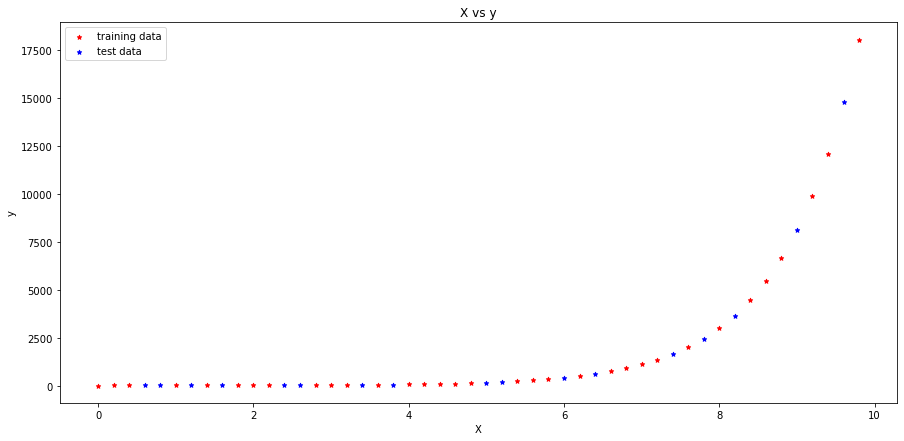

In [11]:
plot()

In [12]:
print("Size of training data")
print(f"Size of train features : {X_train.shape} and size of train labels : {y_train.shape}")
print("Size of test data")
print(f"Size of test features : {X_test.shape} and size of test labels : {y_test.shape}")

Size of training data
Size of train features : torch.Size([33, 1]) and size of train labels : torch.Size([33, 1])
Size of test data
Size of test features : torch.Size([17, 1]) and size of test labels : torch.Size([17, 1])


In [13]:
class RegressionModel(nn.Module):
    
    def __init__(self,input_nodes : int,hidden_nodes : int,output_nodes : int):
        
        super().__init__()
        
        self.deep_neural_network = nn.Sequential(nn.Linear(in_features=input_nodes,out_features=hidden_nodes),
                                                nn.Linear(in_features=hidden_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=output_nodes))
        
    def forward(self,X):
        return self.deep_neural_network(X)

In [14]:
model = RegressionModel(input_nodes=1,hidden_nodes=10,output_nodes=1)

In [15]:
model

RegressionModel(
  (deep_neural_network): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [16]:
model.state_dict()

OrderedDict([('deep_neural_network.0.weight',
              tensor([[-0.3475],
                      [ 0.7345],
                      [ 0.6209],
                      [ 0.3181],
                      [ 0.5142],
                      [-0.6854],
                      [-0.5850],
                      [-0.3498],
                      [-0.2200],
                      [ 0.7829]])),
             ('deep_neural_network.0.bias',
              tensor([ 0.7207,  0.1517, -0.1691, -0.3893,  0.9525, -0.7330,  0.9031, -0.1348,
                       0.8772,  0.8686])),
             ('deep_neural_network.1.weight',
              tensor([[ 0.0778,  0.0242,  0.0573, -0.2540, -0.2463, -0.1718, -0.0971,  0.1091,
                        0.1437,  0.2937],
                      [-0.0362,  0.1612, -0.0105,  0.3162,  0.1712, -0.0588,  0.0435, -0.1444,
                        0.0425, -0.0620],
                      [ 0.2255, -0.1897,  0.2142, -0.1022,  0.2405,  0.2363,  0.0600, -0.0537,
                        0

In [17]:
model.eval()
with torch.inference_mode():
    pred = model(X_train)

In [18]:
pred.shape

torch.Size([33, 1])

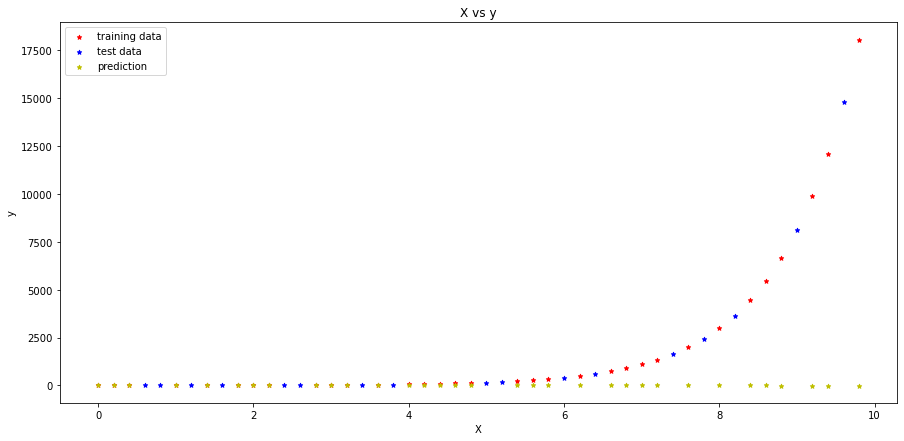

In [19]:
plot(prediction=pred)

In [20]:
lossfn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model.parameters(),lr = 0.05)

In [21]:
epochs = 1000
train_loss = []
test_loss = []

for epoch in range(epochs):
    model.train()
    
    pred = model(X_train)
    
    loss = lossfn(pred,y_train)
    train_loss.append(loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        pred = model(X_test)
    loss = lossfn(pred,y_test)
    test_loss.append(loss.item())
    
    
    if epoch%100 == 0:
        print(f"Epoch : {epoch}, training loss : {train_loss[-1] : 0.2f}, test loss = {test_loss[-1] : 0.3f}")
    if test_loss[-1] < 10:
        print(f"Epoch : {epoch}, training loss : {train_loss[-1] : 0.2f}, test loss = {test_loss[-1] : 0.3f}")
        break
        

Epoch : 0, training loss :  2050.68, test loss =  1889.592
Epoch : 100, training loss :  1582.88, test loss =  1431.038
Epoch : 200, training loss :  545.71, test loss =  547.940
Epoch : 300, training loss :  331.89, test loss =  236.979
Epoch : 400, training loss :  252.53, test loss =  202.250
Epoch : 500, training loss :  165.31, test loss =  155.836
Epoch : 600, training loss :  145.67, test loss =  127.538
Epoch : 700, training loss :  114.47, test loss =  107.742
Epoch : 800, training loss :  114.89, test loss =  90.984
Epoch : 900, training loss :  110.67, test loss =  136.200


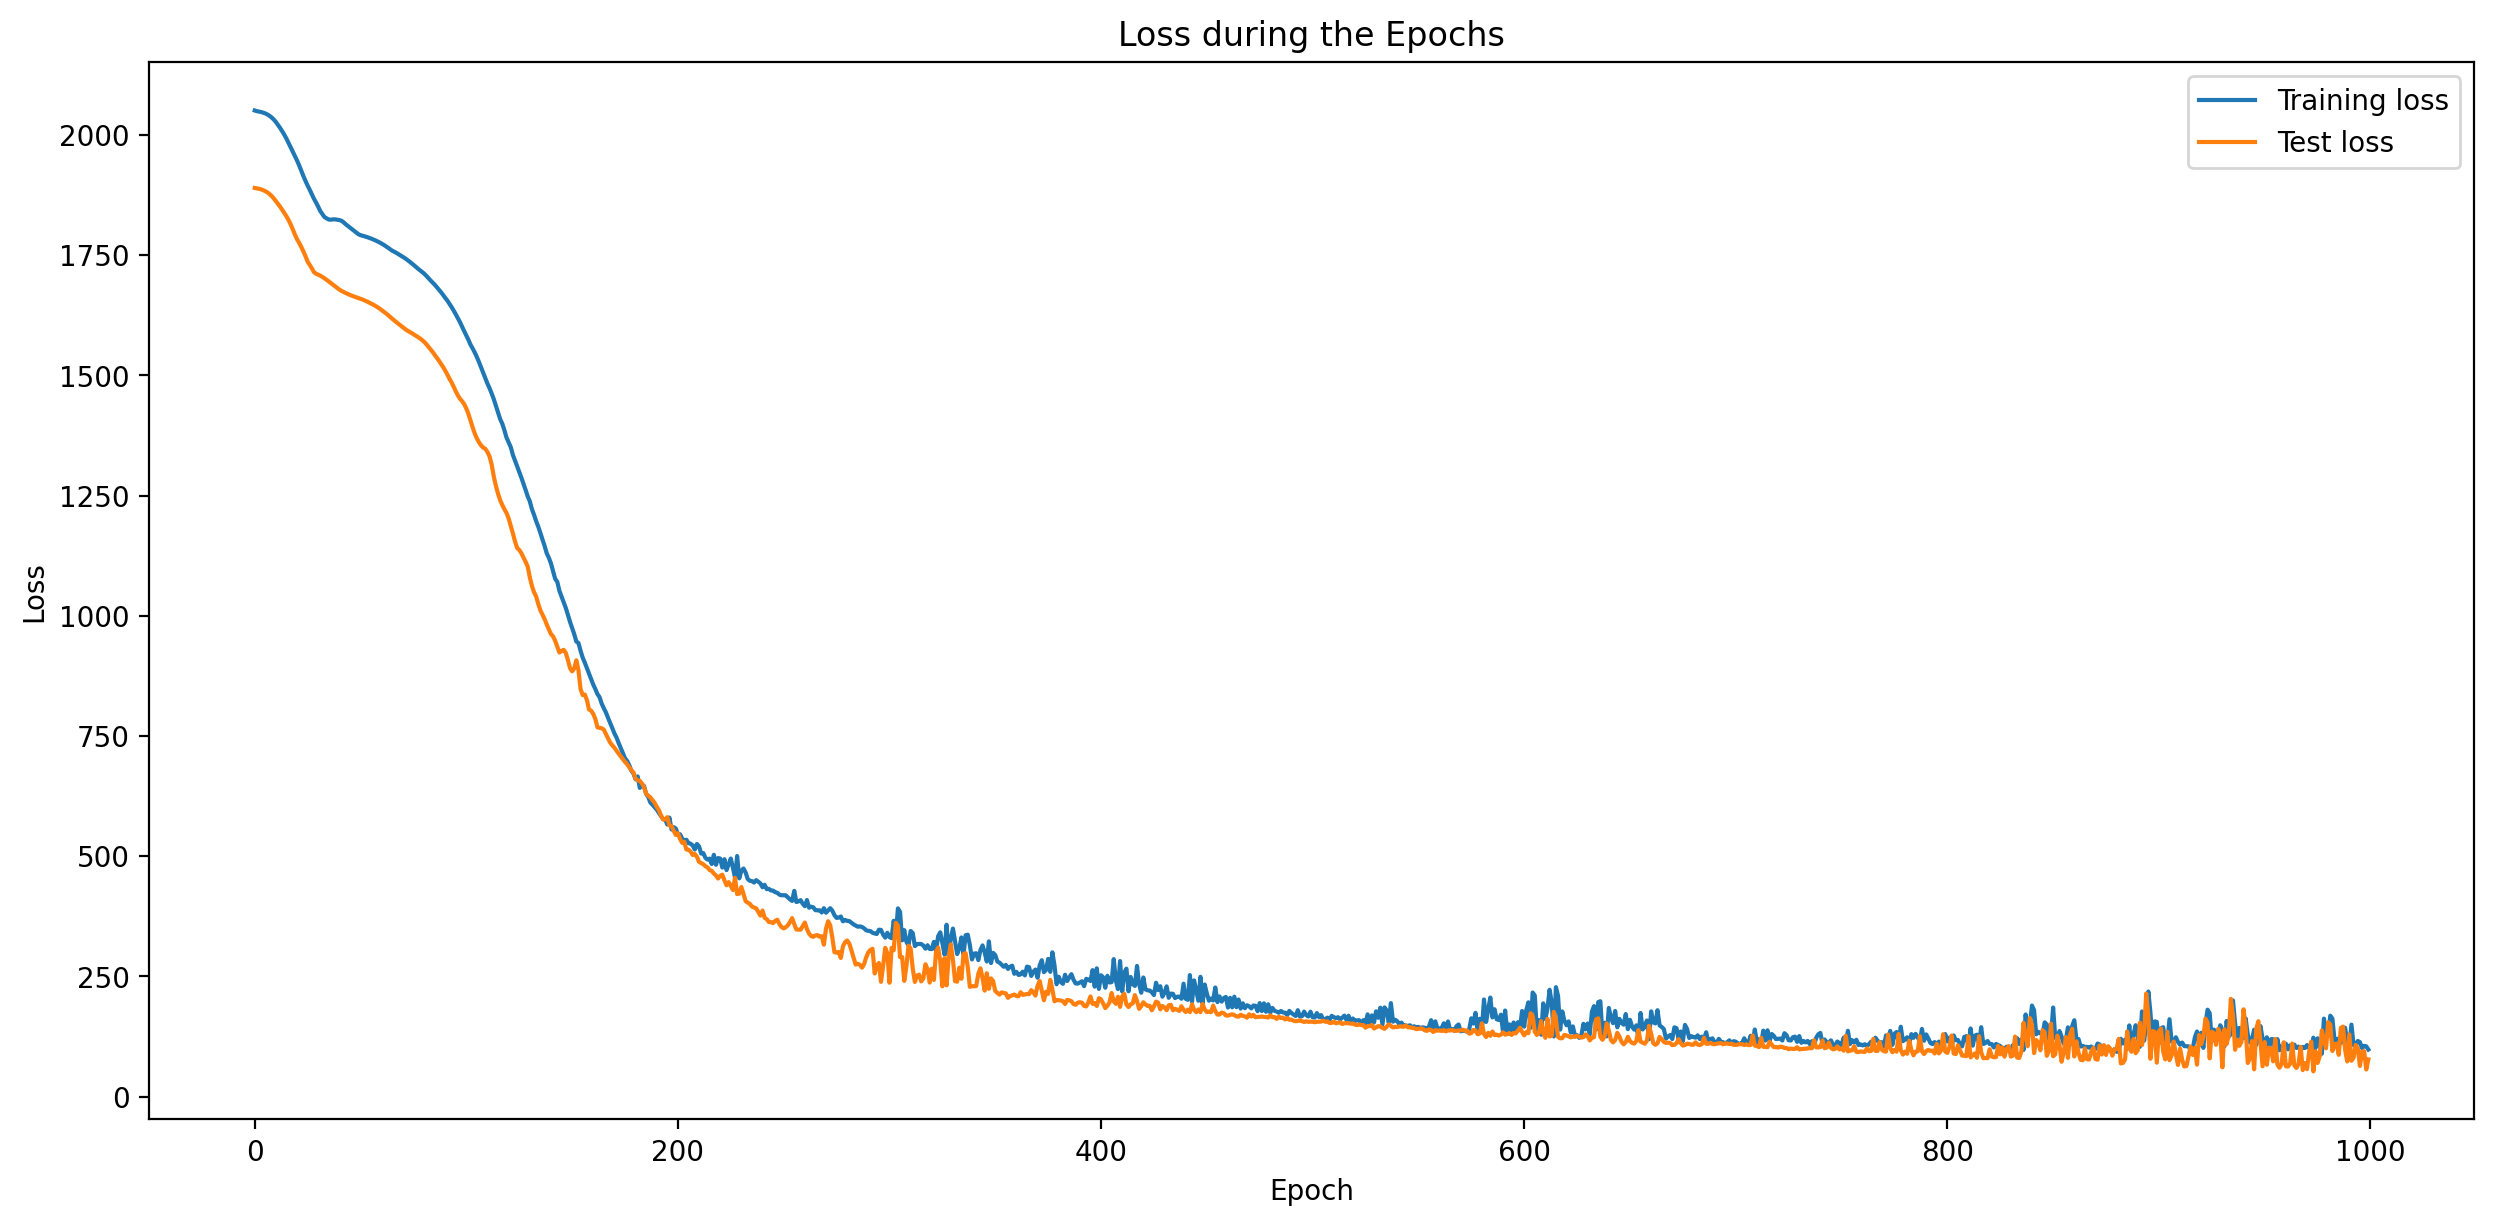

In [22]:
plt.figure(figsize=(15,7),dpi=200)
sns.lineplot(x = range(epoch+1),y = train_loss,label='Training loss')
sns.lineplot(x = range(epoch+1),y = test_loss,label = 'Test loss')
plt.title('Loss during the Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model.eval()
with torch.inference_mode():
    pred = model(X_test)

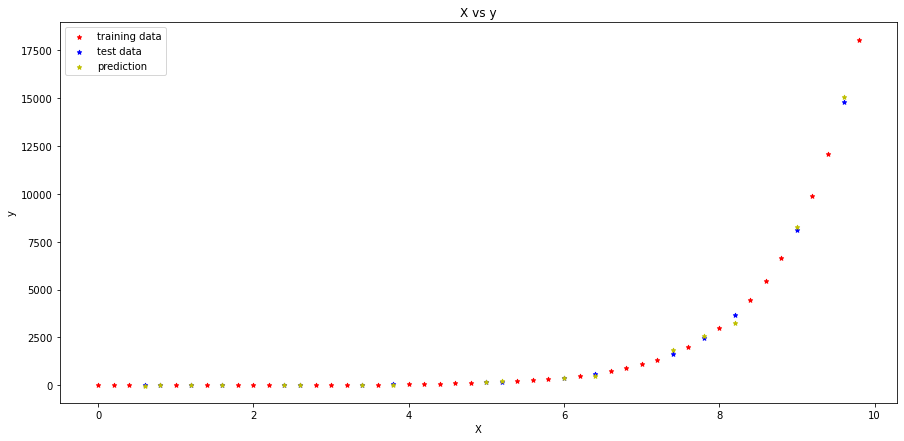

In [24]:
plot(prediction=pred)

# Classification

In [25]:
X,y = make_circles(n_samples=1000,noise = 0.2,factor=0.08)

<AxesSubplot:>

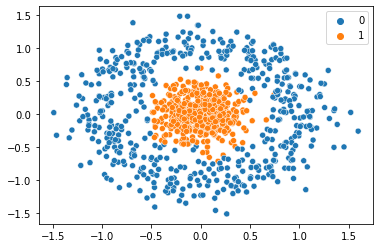

In [26]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue = y)

In [27]:
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

In [28]:
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [29]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<AxesSubplot:>

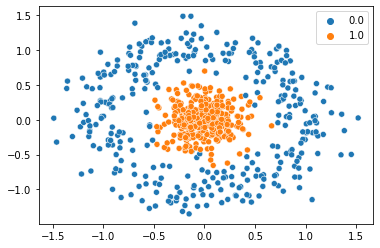

In [31]:
sns.scatterplot(x = X_train[:,0],y = X_train[:,1],hue = y_train)

<AxesSubplot:>

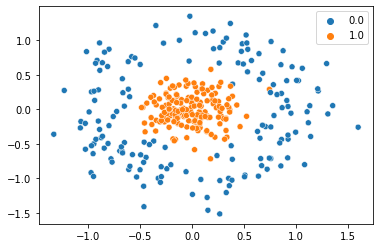

In [32]:
sns.scatterplot(x = X_test[:,0],y = X_test[:,1],hue = y_test)

In [33]:
class BinaryClassification(nn.Module):
    
    def __init__(self,input_nodes : int,hidden_nodes : int,output_nodes : int):
        
        super().__init__()
        
        self.deep_neural_network = nn.Sequential(nn.Linear(in_features=input_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=output_nodes))
        
    def forward(self, X):
        return self.deep_neural_network(X)

In [34]:
model = BinaryClassification(input_nodes=2,hidden_nodes=10,output_nodes=1)

In [35]:
model

BinaryClassification(
  (deep_neural_network): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [36]:
model.state_dict()

OrderedDict([('deep_neural_network.0.weight',
              tensor([[-0.4418, -0.1128],
                      [-0.1050, -0.3354],
                      [ 0.1312, -0.5146],
                      [ 0.5828, -0.4200],
                      [ 0.2561, -0.5275],
                      [-0.4239, -0.6897],
                      [-0.4397,  0.2669],
                      [ 0.0438,  0.6710],
                      [-0.1334, -0.0870],
                      [-0.0515, -0.5628]])),
             ('deep_neural_network.0.bias',
              tensor([-0.4272, -0.4185, -0.6107, -0.2561,  0.3395, -0.4880,  0.5287,  0.0423,
                      -0.5520,  0.4702])),
             ('deep_neural_network.2.weight',
              tensor([[-0.2521,  0.2039, -0.2856, -0.1112,  0.0659,  0.1770,  0.0674,  0.1115,
                       -0.1602,  0.2212],
                      [ 0.2634,  0.0378,  0.0925,  0.1751, -0.0783, -0.0524,  0.1264, -0.1314,
                       -0.1786,  0.2517],
                      [-0.1033

In [37]:
lossfn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [38]:
model.eval()
with torch.inference_mode():
    logits = model(X_train).squeeze()

In [39]:
logits.shape,y_train.shape

(torch.Size([670]), torch.Size([670]))

In [40]:
pred = torch.round(torch.sigmoid(logits))

In [41]:
accuracy_score(pred,y_train)*100

50.0

In [42]:
epochs = 500
train_acc = []
test_acc = []

for epoch in range(epochs):
    model.train()
    
    logits = model(X_train).squeeze()
    pred = torch.round(torch.sigmoid(logits))
    
    loss = lossfn(logits,y_train)
    train_ = accuracy_score(torch.detach(pred),y_train)
    train_acc.append(train_*100)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        logits = model(X_test).squeeze()
    pred = torch.round(torch.sigmoid(logits))
    loss = lossfn(logits,y_test)
    test_ = accuracy_score(torch.detach(pred),y_test)
    test_acc.append(test_*100)
    
    
    if epoch%25 == 0:
        pass
        print(f"Epoch : {epoch}, training accuracy : {train_ : 0.2f}, test loss = {test_ : 0.3f}")
    if test_acc[-1] > 97:
        print(f"Epoch : {epoch}, training accuracy : {train_ : 0.2f}, test loss = {test_: 0.3f}")
        break
        

Epoch : 0, training accuracy :  0.50, test loss =  0.594
Epoch : 25, training accuracy :  0.86, test loss =  0.842
Epoch : 50, training accuracy :  0.95, test loss =  0.942
Epoch : 62, training accuracy :  0.97, test loss =  0.973


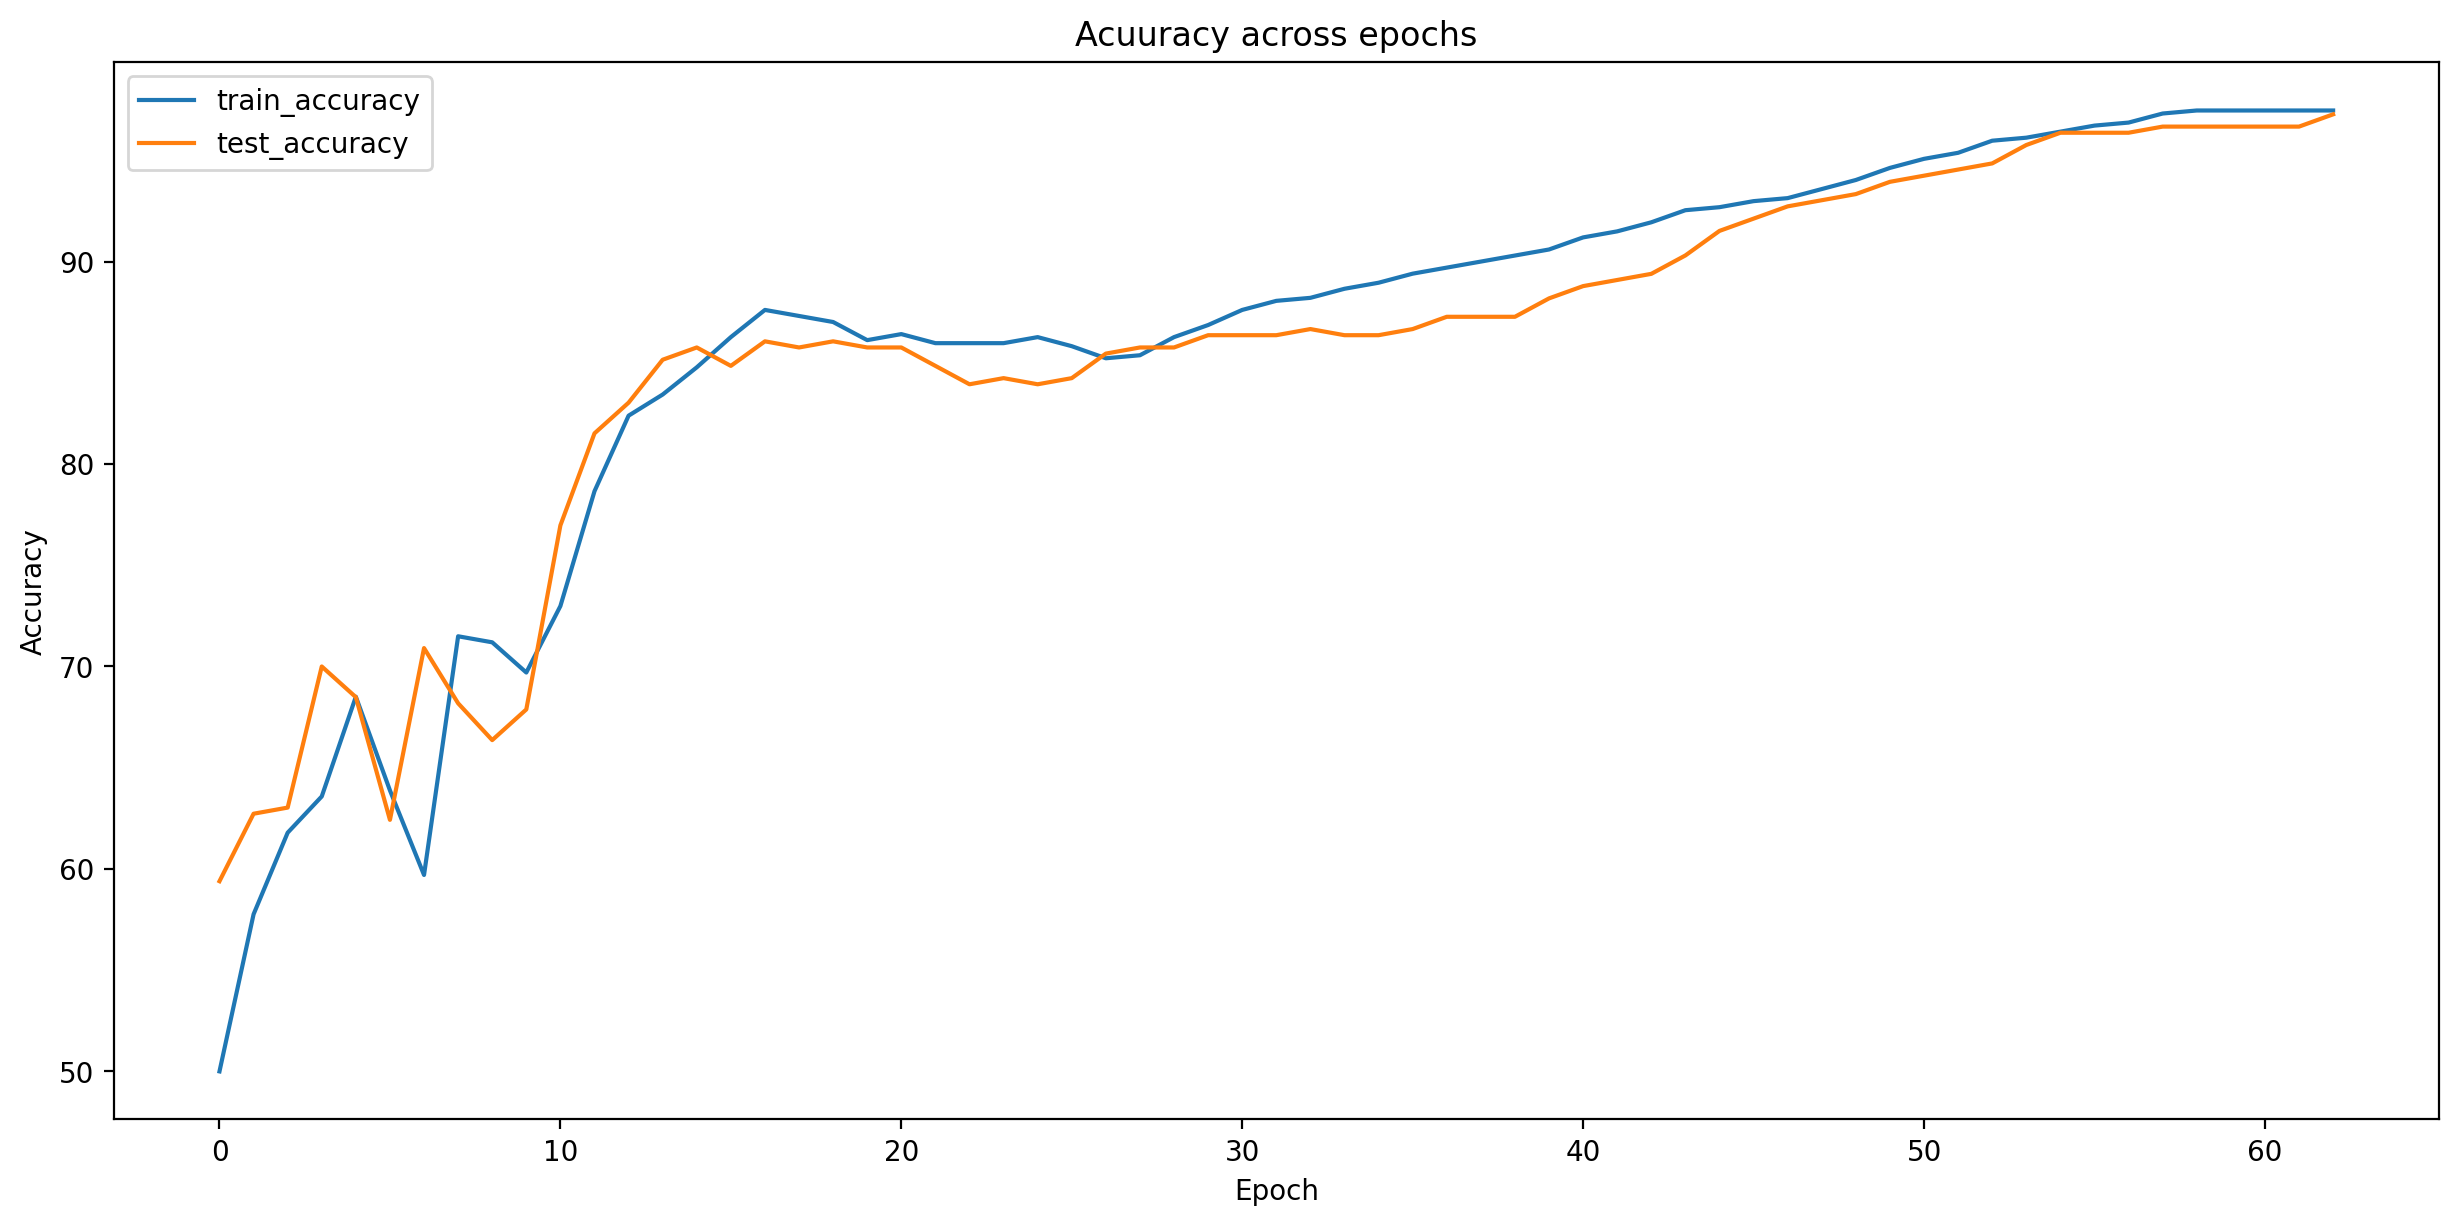

In [43]:
plt.figure(figsize=(15,7),dpi = 200)
sns.lineplot(x = range(epoch+1),y = train_acc,label = 'train_accuracy')
sns.lineplot(x = range(epoch+1),y = test_acc,label = 'test_accuracy')
plt.title("Acuuracy across epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [44]:
model.eval()
with torch.inference_mode():
    logits = model(X_test).squeeze()

In [45]:
pred = torch.round(torch.sigmoid(logits))

In [46]:
accuracy_score(pred,y_test)*100

97.27272727272728

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       160
         1.0       0.97      0.98      0.97       170

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

In [49]:
confusion_matrix(y_test,pred)

array([[155,   5],
       [  4, 166]])

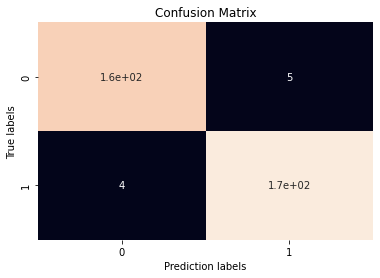

In [50]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction labels')
plt.ylabel('True labels')
plt.show()

In [51]:
X,y = make_blobs(n_samples=1000,centers=4)

<AxesSubplot:>

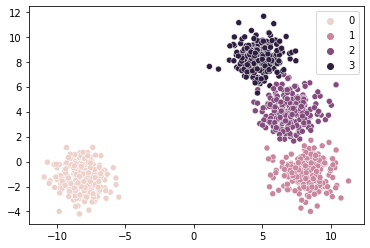

In [52]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue = y)

In [53]:
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.long)

In [54]:
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
class MuticlassClassification(nn.Module):
    
    def __init__(self,input_nodes : int,hidden_nodes : int,output_nodes : int):
        
        super().__init__()
        
        self.deep_neural_network = nn.Sequential(nn.Linear(in_features=input_nodes,out_features=hidden_nodes),
                                                 nn.ReLU(),
                                                 nn.Linear(in_features = hidden_nodes,out_features = hidden_nodes),
                                                 nn.ReLU(),
                                                 nn.Linear(in_features=hidden_nodes,out_features=output_nodes))
    
    def forward(self,X):
        return self.deep_neural_network(X)

In [57]:
model = MuticlassClassification(input_nodes=2,hidden_nodes=10,output_nodes=4)

In [58]:
model

MuticlassClassification(
  (deep_neural_network): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [59]:
model.state_dict()

OrderedDict([('deep_neural_network.0.weight',
              tensor([[ 0.6552,  0.0288],
                      [-0.3302,  0.2445],
                      [-0.6805,  0.1416],
                      [-0.4823, -0.5019],
                      [ 0.3273, -0.6986],
                      [-0.4498,  0.4995],
                      [ 0.6277, -0.2959],
                      [ 0.0943,  0.0158],
                      [-0.3084, -0.0081],
                      [ 0.3217,  0.4541]])),
             ('deep_neural_network.0.bias',
              tensor([-0.0018,  0.2597,  0.0427,  0.2468, -0.4511, -0.6851, -0.2849,  0.2325,
                       0.4257,  0.3557])),
             ('deep_neural_network.2.weight',
              tensor([[-0.2316,  0.0107, -0.3079, -0.0521, -0.2716, -0.0383,  0.1240, -0.2834,
                        0.2017, -0.0440],
                      [ 0.0911,  0.1872, -0.2885, -0.2813, -0.0716, -0.1457,  0.0862,  0.2273,
                       -0.3133, -0.2519],
                      [ 0.2299

In [60]:
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr = 0.01)

In [61]:
model.eval()
with torch.inference_mode():
    logits = model(X_train)

In [62]:
logits.softmax(dim = 1).argmax(dim = 1).shape,y_train.shape

(torch.Size([670]), torch.Size([670]))

In [63]:
epochs = 500
train_acc = []
test_acc = []

for epoch in range(epochs):
    model.train()
    
    logits = model(X_train)
    pred = logits.softmax(dim = 1).argmax(dim = 1)
    
    loss = lossfn(logits,y_train)
    train_ = accuracy_score(torch.detach(pred),y_train)
    train_acc.append(train_*100)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        logits = model(X_test).squeeze()
    pred = logits.softmax(dim = 1).argmax(dim = 1)
    loss = lossfn(logits,y_test)
    test_ = accuracy_score(torch.detach(pred),y_test)
    test_acc.append(test_*100)
    
    
    if epoch%25 == 0:
        pass
        print(f"Epoch : {epoch}, training accuracy : {train_ : 0.2f}, test loss = {test_ : 0.3f}")
    if test_acc[-1] > 97:
        print(f"Epoch : {epoch}, training accuracy : {train_ : 0.2f}, test loss = {test_: 0.3f}")
        break
        

Epoch : 0, training accuracy :  0.47, test loss =  0.500
Epoch : 15, training accuracy :  0.97, test loss =  0.979


In [64]:
model.eval()
with torch.inference_mode():
    logits = model(X_test)
pred = logits.softmax(dim = 1).argmax(dim = 1)
accuracy_score(pred,y_test)

0.9787878787878788

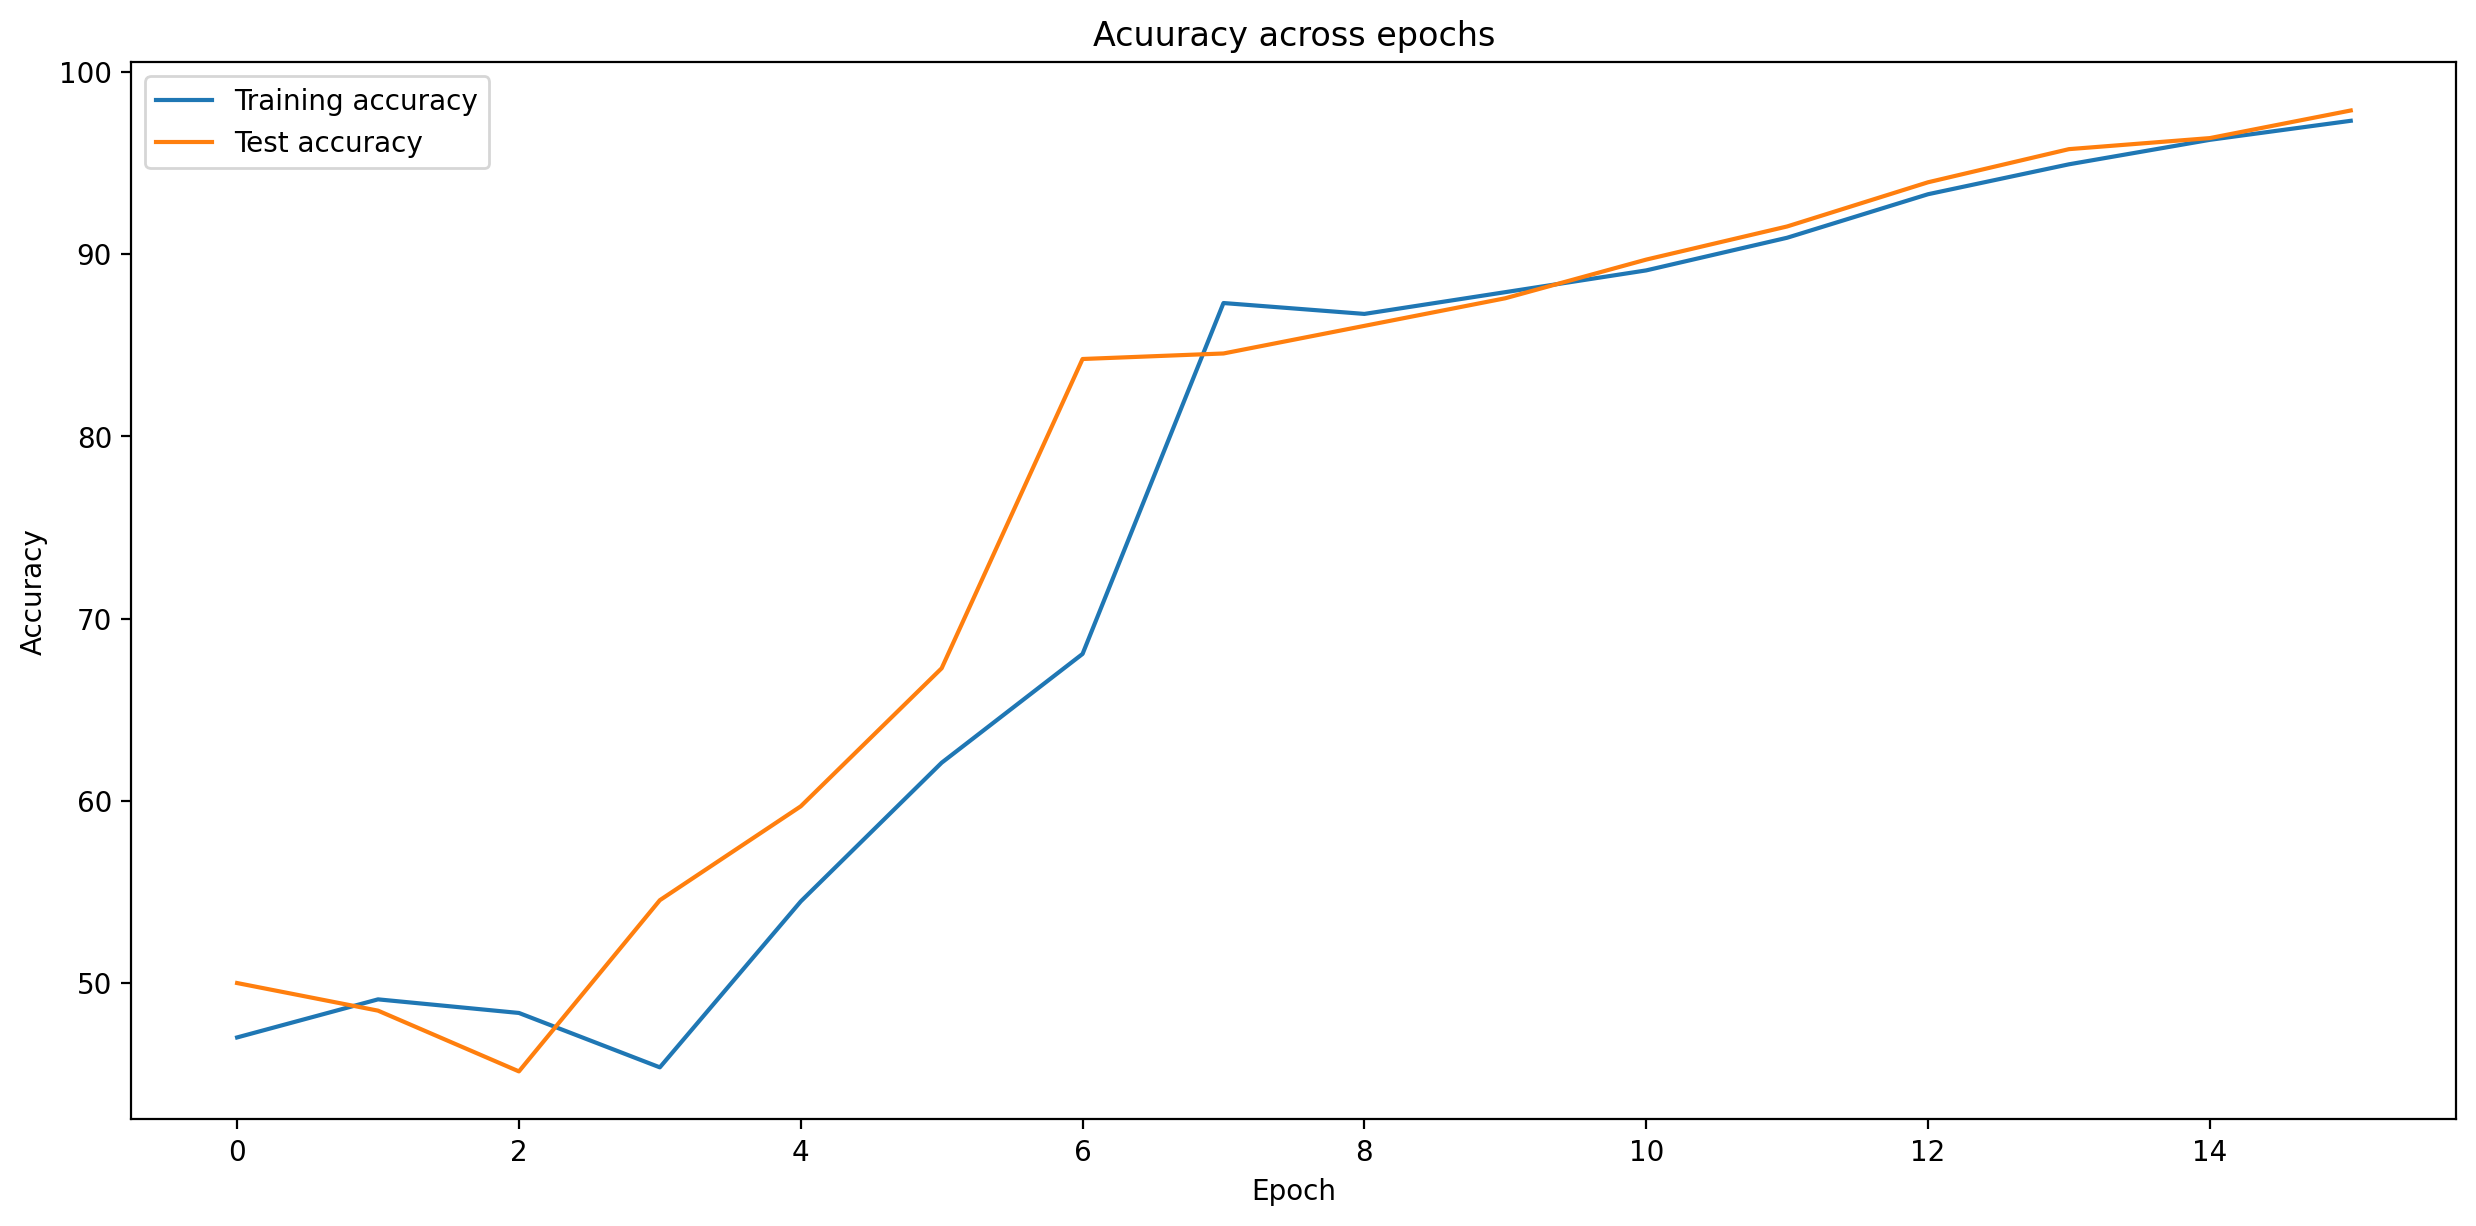

In [65]:
plt.figure(figsize=(15,7),dpi = 200)
sns.lineplot(x = range(epoch+1),y = train_acc,label = 'Training accuracy')
sns.lineplot(x = range(epoch+1),y = test_acc,label = 'Test accuracy')
plt.title("Acuuracy across epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.97      0.99      0.98        72
           2       0.99      0.94      0.96        95
           3       0.95      1.00      0.98        80

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



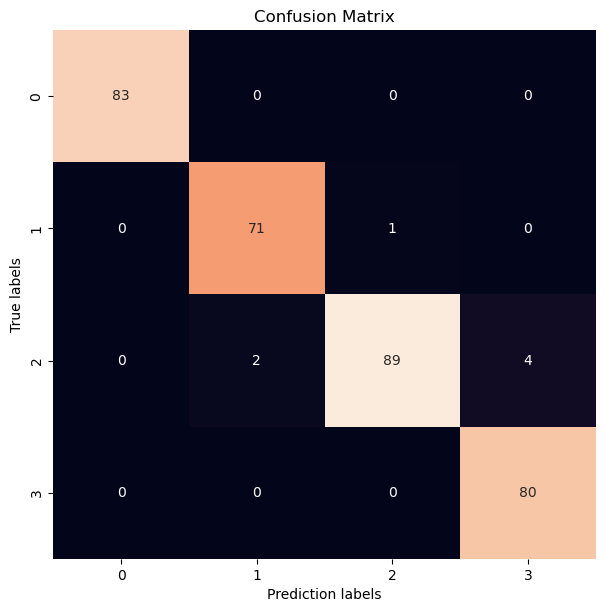

In [67]:
plt.figure(figsize=(7,7),dpi = 100)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction labels')
plt.ylabel('True labels')
plt.show()

# Computer vision

In [68]:
import torchvision
from torchvision import transforms
from torchvision import datasets,models
from torch.utils.data import DataLoader,Dataset

In [69]:
train_data = datasets.FashionMNIST(root = 'data',train = True,transform=transforms.ToTensor(),download = True)
test_data = datasets.FashionMNIST(root = 'data',train = False,transform=transforms.ToTensor(),download = True)

In [70]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [71]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [72]:
len(train_data),len(test_data)

(60000, 10000)

In [73]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [74]:
type(test_data)

torchvision.datasets.mnist.FashionMNIST

In [75]:
class_lst = train_data.classes

In [76]:
class_dict = train_data.class_to_idx

In [77]:
unique_lst = []
lst = []
for i in range(len(train_data)):
    Image,label = train_data[i]
    if label not in lst:
        lst.append(label)
        unique_lst.append((Image,class_lst[label]))
    if len(lst) == len(class_lst):
        break  

In [78]:
len(unique_lst)

10

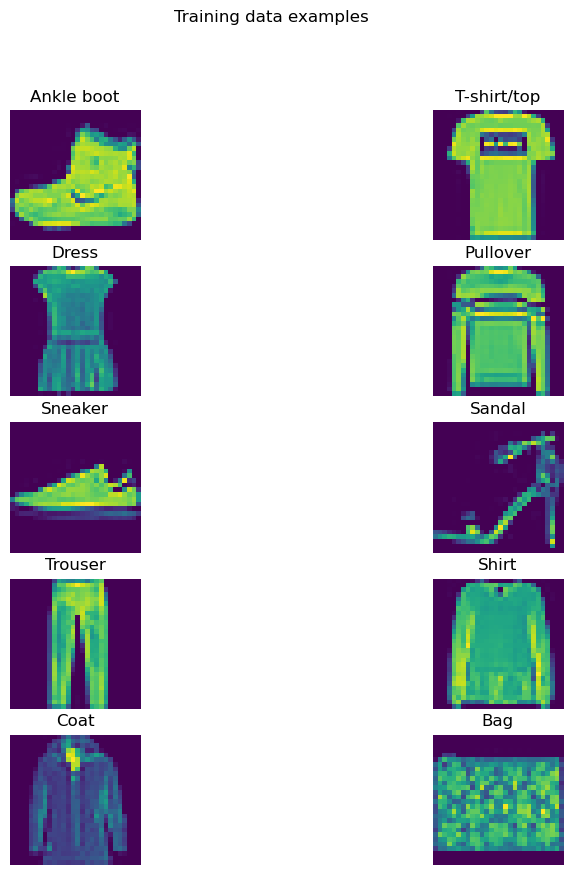

In [79]:
plt.figure(figsize=(10,10),dpi = 100)
plt.suptitle('Training data examples ')
for num,tup in enumerate(unique_lst):
    Image,label = tup
    plt.subplot(5,2,num+1)
    plt.axis(False)
    plt.imshow(Image.permute(1,2,0))
    plt.title(label)

In [80]:
unique_lst = []
lst = []
for i in range(len(test_data)):
    Image,label = test_data[i]
    if label not in lst:
        lst.append(label)
        unique_lst.append((Image,class_lst[label]))
    if len(lst) == len(class_lst):
        break 

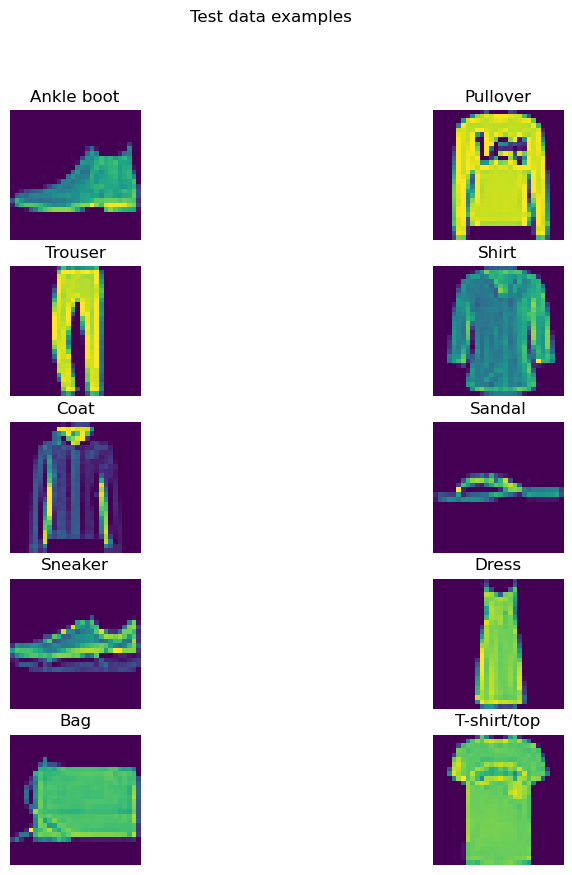

In [81]:
plt.figure(figsize=(10,10),dpi = 100)
plt.suptitle('Test data examples ')
for num,tup in enumerate(unique_lst):
    Image,label = tup
    plt.subplot(5,2,num+1)
    plt.axis(False)
    plt.imshow(Image.permute(1,2,0))
    plt.title(label)

In [82]:
train_data_batches = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_data_batches = DataLoader(dataset=test_data,batch_size=32)

In [83]:
train_data_batches,test_data_batches

(<torch.utils.data.dataloader.DataLoader at 0x16ddc1fd0>,
 <torch.utils.data.dataloader.DataLoader at 0x16dd6ee50>)

In [84]:
len(train_data_batches),len(train_data)/32

(1875, 1875.0)

In [85]:
len(test_data_batches),len(test_data)/32

(313, 312.5)

In [86]:
train_data_batch = next(iter(train_data_batches))
test_data_batch = next(iter(train_data_batches))

In [87]:
len(train_data_batch),len(test_data_batch)

(2, 2)

In [88]:
Images,labels = train_data_batch

In [89]:
len(Images),len(labels)

(32, 32)

In [90]:
type(Images),type(labels)

(torch.Tensor, torch.Tensor)

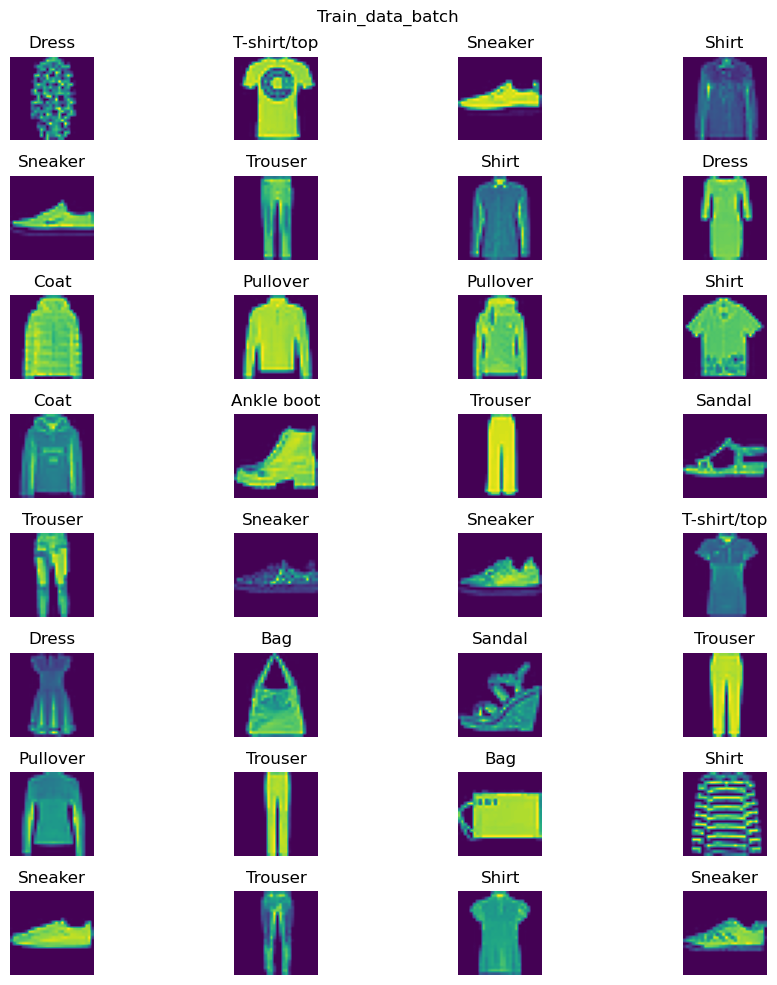

In [91]:
plt.figure(figsize=(10,10),dpi = 100)
for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(Images[i].permute(1,2,0))
    plt.title(class_lst[labels[i].item()])
    plt.axis(False)
plt.suptitle("Train_data_batch")
plt.tight_layout()
plt.show()

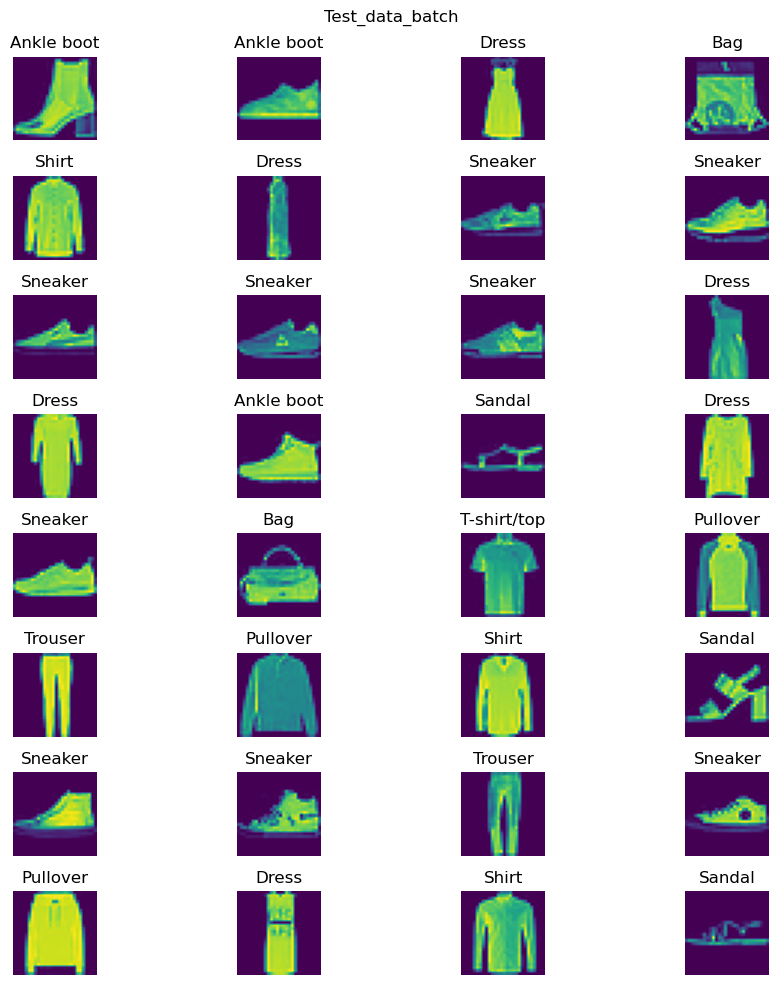

In [92]:
Images,labels = test_data_batch
plt.figure(figsize=(10,10),dpi = 100)
for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(Images[i].permute(1,2,0))
    plt.title(class_lst[labels[i].item()])
    plt.axis(False)
plt.suptitle("Test_data_batch")
plt.tight_layout()
plt.show()

In [93]:
Image.shape

torch.Size([1, 28, 28])

In [94]:
flatten = nn.Flatten()
op = flatten(Image)

In [95]:
op = op.view([1,28,28])

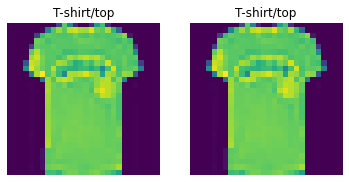

In [96]:
plt.subplot(1,2,1)
plt.imshow(Image.permute(1,2,0))
plt.title(label)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(op.permute(1,2,0))
plt.title(label)
plt.axis(False)
plt.show()

In [97]:
class ComputerVisionModel(nn.Module):
    
    def __init__(self,input_nodes : int,hidden_nodes : int,output_nodes : int):
        
        super().__init__()
        
        self.deep_neural_network = nn.Sequential(nn.Flatten(),
                                                nn.Linear(in_features=input_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=output_nodes))
    
    def forward(self,X):
        return self.deep_neural_network(X)

In [98]:
model = ComputerVisionModel(input_nodes=28*28,hidden_nodes=10,output_nodes=10)

In [99]:
model

ComputerVisionModel(
  (deep_neural_network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [100]:
model.state_dict()

OrderedDict([('deep_neural_network.1.weight',
              tensor([[ 0.0084, -0.0133,  0.0264,  ...,  0.0257,  0.0149, -0.0276],
                      [ 0.0003, -0.0112,  0.0081,  ..., -0.0094, -0.0003, -0.0122],
                      [ 0.0336, -0.0007,  0.0067,  ..., -0.0204,  0.0183,  0.0288],
                      ...,
                      [-0.0057,  0.0186,  0.0345,  ..., -0.0287, -0.0128, -0.0339],
                      [-0.0003,  0.0066,  0.0335,  ..., -0.0310,  0.0002, -0.0267],
                      [ 0.0156,  0.0243,  0.0147,  ..., -0.0325, -0.0200,  0.0070]])),
             ('deep_neural_network.1.bias',
              tensor([-0.0002, -0.0127,  0.0198, -0.0007, -0.0199, -0.0276,  0.0355, -0.0315,
                       0.0146,  0.0265])),
             ('deep_neural_network.3.weight',
              tensor([[-0.1422, -0.2201,  0.2285, -0.0182, -0.1939,  0.3092, -0.2985, -0.0904,
                       -0.2524, -0.0896],
                      [ 0.2418,  0.1708,  0.3144,  0.103

In [101]:
test_img = torch.randn([1,28,28])

In [102]:
model(test_img).argmax(dim = 1)

tensor([7])

In [103]:
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [104]:
model.eval()
with torch.inference_mode():
    Images,labels = train_data_batch
    logits = model(Images)

In [105]:
accuracy_score(logits.argmax(dim = 1),labels)*100

18.75

In [106]:
#Which mean for every 32 images, there is a good chance that 2 images are labelled properly
(2/32)*100

6.25

In [107]:
loss = lossfn(logits,labels)

In [108]:
loss

tensor(2.2868)

In [109]:
epochs = 10
train_acc_lst = []
test_acc_lst = []
batch_train_acc_lst = []
batch_test_acc_lst = []

for epoch in range(epochs):
    
    train_loss = 0
    train_accuracy = 0
    print(f"Epoch : {epoch}")
    print(f"Training loop")
    for num,batch in enumerate(train_data_batches,start=1):
        model.train()
        Images, labels = batch
        
        logits  =  model(Images)
        
        loss = lossfn(logits,labels)
        train_loss += loss
        accuracy = accuracy_score(logits.argmax(dim = 1),labels)*100
        train_accuracy += accuracy
        batch_train_acc_lst.append(accuracy)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if num%400 == 0:
            print(f"Batch number : {num} out of {len(train_data_batches)}, Training loss = {train_loss/num}, Training accuracy = {train_accuracy/num}")
    train_acc_lst.append(train_accuracy/num)
    
    test_loss = 0
    test_accuracy = 0
    
    print('Test loop')
    
    for num,batch in enumerate(test_data_batches,start = 1):
        model.eval()
        Images,labels = batch
        
        logits = model(Images)
        
        loss = lossfn(logits,labels)
        test_loss += loss
        accuracy = accuracy_score(logits.argmax(dim = 1),labels)*100
        test_accuracy += accuracy
        batch_test_acc_lst.append(accuracy)
        
        if num%100 == 0:
            print(f"Batch number : {num} out of {len(test_data_batches)}, Test loss = {test_loss/num}, Test accuracy = {test_accuracy/num}")
    test_acc_lst.append(test_accuracy/num)
    
    print(f"Epoch train accuracy = {train_acc_lst[-1]}, Epoch test accuracy = {test_acc_lst[-1]}")
    print("End of Epoch \n-------------")
        
        
        
        
        

Epoch : 0
Training loop
Batch number : 400 out of 1875, Training loss = 0.7964945435523987, Training accuracy = 70.53125
Batch number : 800 out of 1875, Training loss = 0.6949371099472046, Training accuracy = 74.71484375
Batch number : 1200 out of 1875, Training loss = 0.6514300107955933, Training accuracy = 76.49739583333333
Batch number : 1600 out of 1875, Training loss = 0.6229837536811829, Training accuracy = 77.626953125
Test loop
Batch number : 100 out of 313, Test loss = 0.5045261979103088, Test accuracy = 81.90625
Batch number : 200 out of 313, Test loss = 0.5388978719711304, Test accuracy = 80.890625
Batch number : 300 out of 313, Test loss = 0.5409558415412903, Test accuracy = 80.625
Epoch train accuracy = 78.16333333333333, Epoch test accuracy = 80.76078274760384
End of Epoch 
-------------
Epoch : 1
Training loop
Batch number : 400 out of 1875, Training loss = 0.5142620205879211, Training accuracy = 81.8046875
Batch number : 800 out of 1875, Training loss = 0.51267528533935

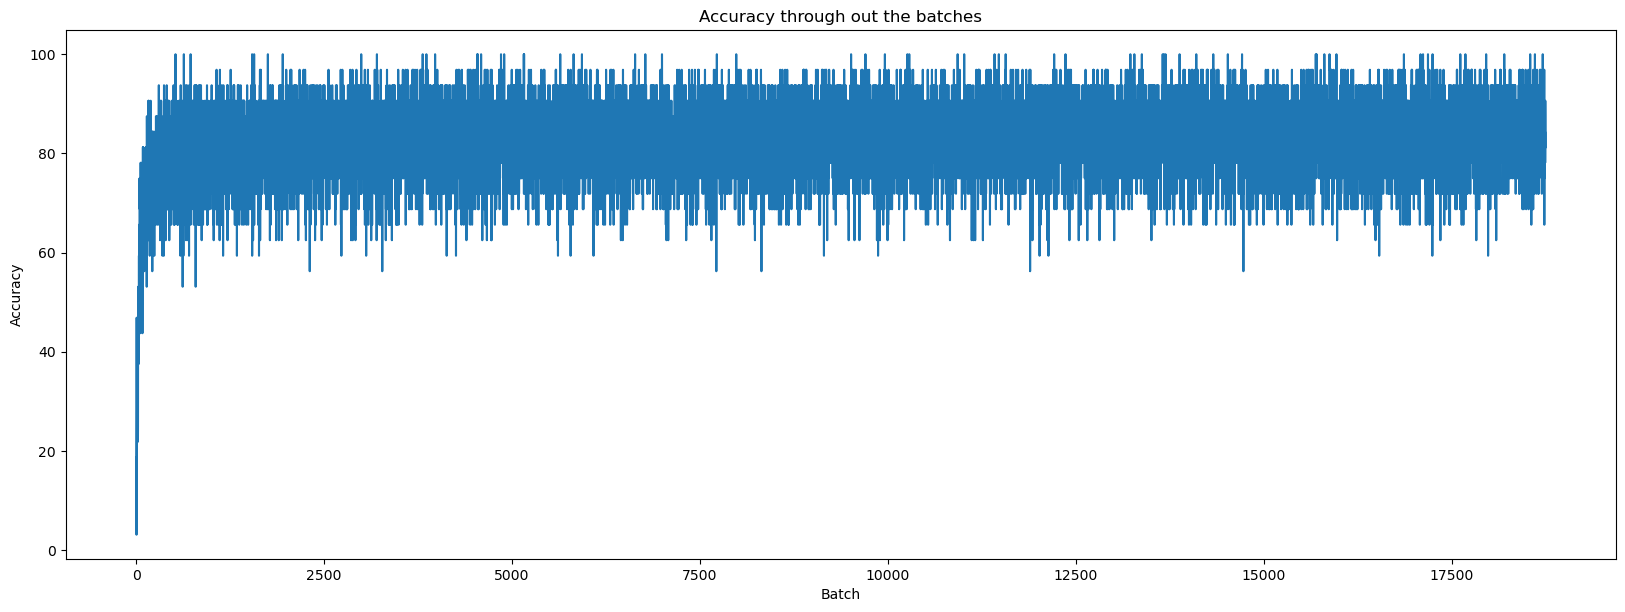

In [118]:
plt.figure(figsize=(20,7),dpi = 100)
sns.lineplot(x = range(len(batch_train_acc_lst)),y = batch_train_acc_lst)
plt.title("Accuracy through out the batches")
plt.xlabel("Batch")
plt.ylabel('Accuracy')
plt.show()

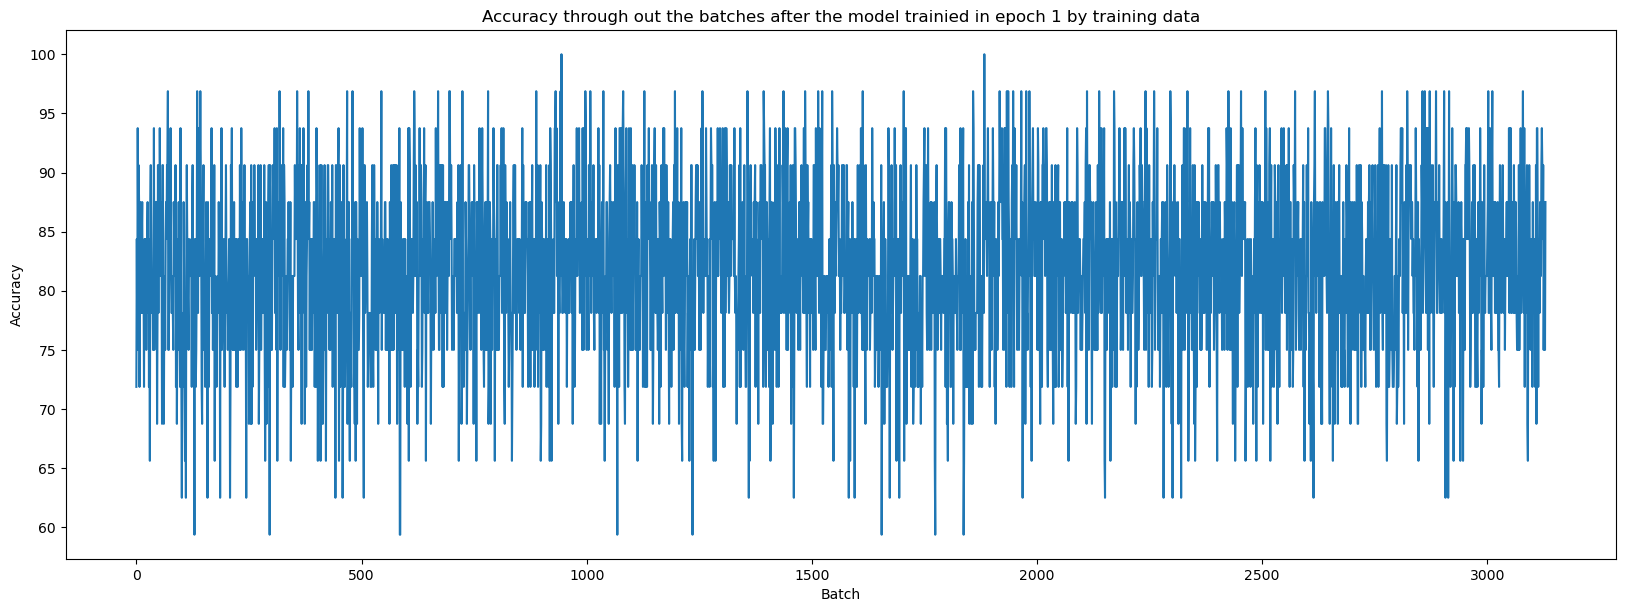

In [119]:
plt.figure(figsize=(20,7),dpi = 100)
sns.lineplot(x = range(len(batch_test_acc_lst)),y = batch_test_acc_lst)
plt.title("Accuracy through out the batches after the model trainied in epoch 1 by training data")
plt.xlabel("Batch")
plt.ylabel('Accuracy')
plt.show()

In [152]:
random.seed(42)
choice = random.choice(range(len(test_data_batches)))

In [153]:
test_batch = list(test_data_batches)[choice]

In [154]:
Images,labels = test_batch

In [155]:
model.eval()
with torch.inference_mode():
    logits = model(Images)
accuracy_score(logits.argmax(dim = 1),labels)

0.875

In [156]:
pred = logits.argmax(dim = 1)

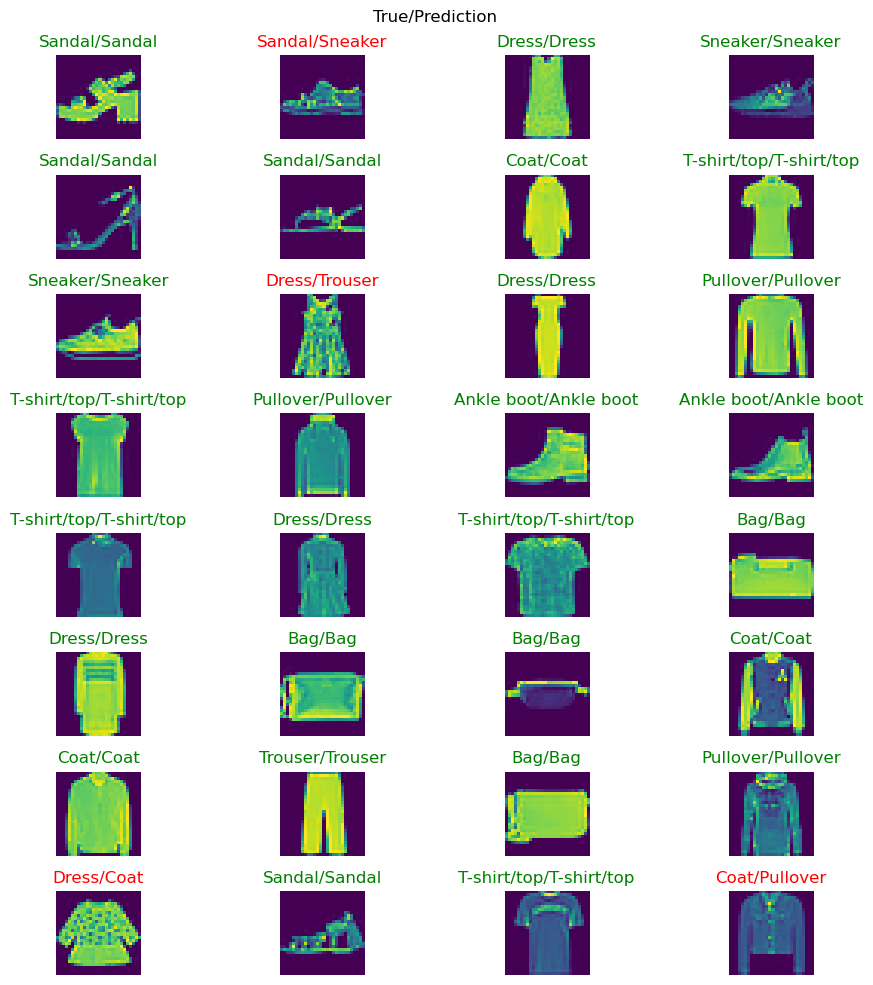

In [161]:
plt.figure(figsize=(10,10),dpi = 100)
for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(Images[i].permute(1,2,0))
    title = plt.title(class_lst[labels[i].item()]+'/'+class_lst[pred[i]])
    if pred[i] == labels[i]:
        title.set_color("green")
    else:
        title.set_color("red")
    plt.axis(False)
plt.suptitle("True/Prediction")
plt.tight_layout()
plt.show()

<AxesSubplot:>

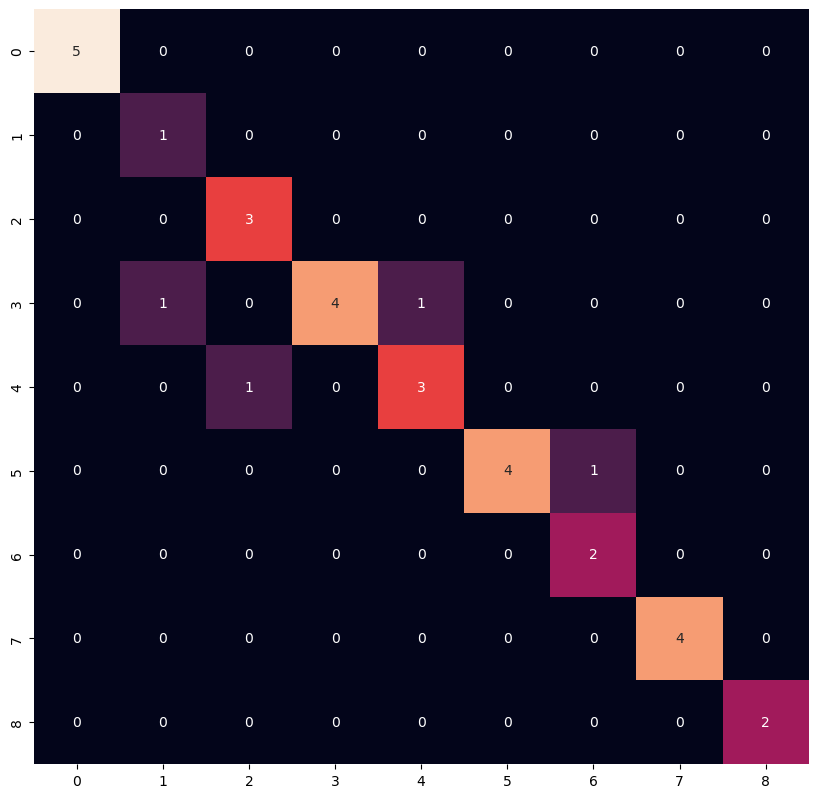

In [169]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(confusion_matrix(labels,pred),annot=True,cbar = False)

In [166]:
class_lst

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [167]:
pred

tensor([5, 7, 3, 7, 5, 5, 4, 0, 7, 1, 3, 2, 0, 2, 9, 9, 0, 3, 0, 8, 3, 8, 8, 4,
        4, 1, 8, 2, 4, 5, 0, 2])

In [168]:
labels

tensor([5, 5, 3, 7, 5, 5, 4, 0, 7, 3, 3, 2, 0, 2, 9, 9, 0, 3, 0, 8, 3, 8, 8, 4,
        4, 1, 8, 2, 3, 5, 0, 4])